In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/mercari/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/mercari/test_stg2.tsv
/kaggle/input/mercari/sample_submission_stg2.csv
/kaggle/input/mercari/test.tsv
/kaggle/input/mercari/train.tsv
/kaggle/input/mercari/sample_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:

sample_submission = pd.read_csv("../input/mercari/sample_submission.csv")
sample_submission_stg2 = pd.read_csv("../input/mercari/sample_submission_stg2.csv")

In [4]:
#importing train data
raw_data=pd.read_csv("../input/mercari/train.tsv",sep="\t")

In [5]:
test_data=pd.read_csv("../input/mercari/test_stg2.tsv",sep="\t")

In [6]:
test_data.head(2)

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."


In [7]:
test_data.shape

(3460725, 7)

In [8]:
raw_data.shape

(1482535, 8)

In [9]:
# seeing the first few rows of raw data
print(raw_data.shape)
raw_data.head(5)

(1482535, 8)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [10]:
# checking the null values in name column
raw_data['name'].isnull().sum()

0

In [11]:
#converting all text to lower case
raw_data['name']=raw_data['name'].str.lower()

In [12]:
raw_data.head(2)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,mlb cincinnati reds t shirt size xl,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,razer blackwidow chroma keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...


No Null Values in the name column. all items have a name

In [13]:
#checking distinct values in item condition id
raw_data['item_condition_id'].value_counts()

1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64

In [14]:
raw_data['item_condition_id'].isnull().sum()

0

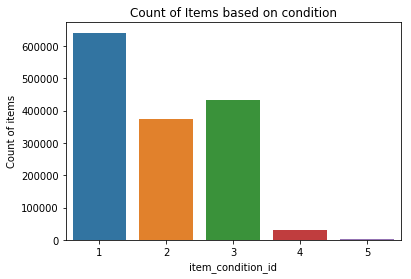

1    0.432063
2    0.253268
3    0.291501
4    0.021559
5    0.001608
Name: item_condition_id, dtype: float64


In [15]:
sns.countplot(x='item_condition_id',data=raw_data)
plt.ylabel("Count of items")
plt.title("Count of Items based on condition")
plt.show()

print(raw_data.item_condition_id.value_counts(normalize=True,sort=False))

* No Null Values in the item condition
* Most of the products have condition equal to 1 (43.2%)
* ~98% of the items have condition <=3

In [16]:
# exploring category
raw_data['category_name'].isnull().sum()

print("6327(0.4%) items have no category mention")

6327(0.4%) items have no category mention


In [17]:
#checking most frequently occuring categories
raw_data['category_name'].value_counts()[:10]

Women/Athletic Apparel/Pants, Tights, Leggings                 60177
Women/Tops & Blouses/T-Shirts                                  46380
Beauty/Makeup/Face                                             34335
Beauty/Makeup/Lips                                             29910
Electronics/Video Games & Consoles/Games                       26557
Beauty/Makeup/Eyes                                             25215
Electronics/Cell Phones & Accessories/Cases, Covers & Skins    24676
Women/Underwear/Bras                                           21274
Women/Tops & Blouses/Tank, Cami                                20284
Women/Tops & Blouses/Blouse                                    20284
Name: category_name, dtype: int64

In [18]:
raw_data['category_name'].nunique()

1287

There are 1,287 unique categories

In [19]:
## converting all category names to lower case
raw_data['category_name']=raw_data['category_name'].str.lower()

In [20]:
raw_data.head(2)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,mlb cincinnati reds t shirt size xl,3,men/tops/t-shirts,NaN,10.0,1,No description yet
1,1,razer blackwidow chroma keyboard,3,electronics/computers & tablets/components & p...,Razer,52.0,0,This keyboard is in great condition and works ...


In [21]:
#splitting category into three columns
# https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/
sub_category_columns=raw_data['category_name'].str.split("/",expand=True,n=2)

In [22]:
raw_data['category']=sub_category_columns[0]
raw_data['subcategory1']=sub_category_columns[1]
raw_data['subcategory2']=sub_category_columns[2]

In [23]:
raw_data[raw_data['category_name']=='women/athletic apparel/pants, tights, leggings'].head(2)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category,subcategory1,subcategory2
27,27,lularoe os black with white polka dots,3,"women/athletic apparel/pants, tights, leggings",LuLaRoe,24.0,0,Worn one time. Excellent condition,women,athletic apparel,"pants, tights, leggings"
31,31,"new lularoe os leggings, stars",1,"women/athletic apparel/pants, tights, leggings",NaN,50.0,1,No description yet,women,athletic apparel,"pants, tights, leggings"


In [24]:
#exploring brand names
print("Distinct Brand Names : {}".format(raw_data['brand_name'].nunique()))
print("Missing Brand Names : {}".format(raw_data['brand_name'].isnull().sum()),"Percentage :{}".format(raw_data['brand_name'].isnull().sum()/raw_data.shape[0]))

Distinct Brand Names : 4809
Missing Brand Names : 632682 Percentage :0.4267568725190299


There are close to 43% of items which dont have a brand name against it.
We will try and see if we can fill these brand names using name of the product

In [25]:
#converting brand names to lower case
raw_data['brand_name']=raw_data['brand_name'].str.lower()

In [26]:
raw_data.head(2)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category,subcategory1,subcategory2
0,0,mlb cincinnati reds t shirt size xl,3,men/tops/t-shirts,NaN,10.0,1,No description yet,men,tops,t-shirts
1,1,razer blackwidow chroma keyboard,3,electronics/computers & tablets/components & p...,razer,52.0,0,This keyboard is in great condition and works ...,electronics,computers & tablets,components & parts


In [27]:
# trying to impute brand name
list_of_brand_names=raw_data['brand_name'].unique().tolist()
print(len(list_of_brand_names))
cleaned_brand_list = [x for x in list_of_brand_names if str(x) != 'nan']
print(len(cleaned_brand_list))

4810
4809


In [28]:
#top 10 brand names
raw_data['brand_name'].value_counts().head(10)

pink                 54088
nike                 54043
victoria's secret    48036
lularoe              31024
apple                17322
forever 21           15186
nintendo             15007
lululemon            14558
michael kors         13928
american eagle       13254
Name: brand_name, dtype: int64

In [29]:
def brand_replace(column):
    for i in cleaned_brand_list:
        if i in str(column).split():
            return i

In [30]:
raw_data['Newbrand']=raw_data['name'].apply(brand_replace)

In [31]:
raw_data.head(5)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category,subcategory1,subcategory2,Newbrand
0,0,mlb cincinnati reds t shirt size xl,3,men/tops/t-shirts,NaN,10.0,1,No description yet,men,tops,t-shirts,mlb
1,1,razer blackwidow chroma keyboard,3,electronics/computers & tablets/components & p...,razer,52.0,0,This keyboard is in great condition and works ...,electronics,computers & tablets,components & parts,razer
2,2,ava-viv blouse,1,women/tops & blouses/blouse,target,10.0,1,Adorable top with a hint of lace and a key hol...,women,tops & blouses,blouse,None
3,3,leather horse statues,1,home/home décor/home décor accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,home,home décor,home décor accents,None
4,4,24k gold plated rose,1,women/jewelry/necklaces,NaN,44.0,0,Complete with certificate of authenticity,women,jewelry,necklaces,None


In [32]:
raw_data['brand_name']=np.where(raw_data['brand_name'].isnull(),raw_data['Newbrand'],raw_data['brand_name'])

In [33]:
print("Missing Brand Names : {}".format(raw_data['brand_name'].isnull().sum()),"Percentage :{}".format(raw_data['brand_name'].isnull().sum()/raw_data.shape[0]))

Missing Brand Names : 402781 Percentage :0.2716839737341783


By imputing brand names from description column we have been able to get NANs down to 27% from 43%

In [34]:
raw_data['brand_name'].fillna(value="Not Present", inplace=True)

In [35]:
raw_data.head(5)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category,subcategory1,subcategory2,Newbrand
0,0,mlb cincinnati reds t shirt size xl,3,men/tops/t-shirts,mlb,10.0,1,No description yet,men,tops,t-shirts,mlb
1,1,razer blackwidow chroma keyboard,3,electronics/computers & tablets/components & p...,razer,52.0,0,This keyboard is in great condition and works ...,electronics,computers & tablets,components & parts,razer
2,2,ava-viv blouse,1,women/tops & blouses/blouse,target,10.0,1,Adorable top with a hint of lace and a key hol...,women,tops & blouses,blouse,None
3,3,leather horse statues,1,home/home décor/home décor accents,Not Present,35.0,1,New with tags. Leather horses. Retail for [rm]...,home,home décor,home décor accents,None
4,4,24k gold plated rose,1,women/jewelry/necklaces,Not Present,44.0,0,Complete with certificate of authenticity,women,jewelry,necklaces,None


Text(0, 0.5, 'Frequency')

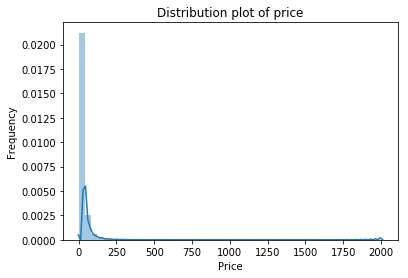

In [36]:
## plotting price
sns.distplot(raw_data['price'])
plt.title("Distribution plot of price")
plt.xlabel("Price")
plt.ylabel('Frequency')

Text(0, 0.5, 'frequency')

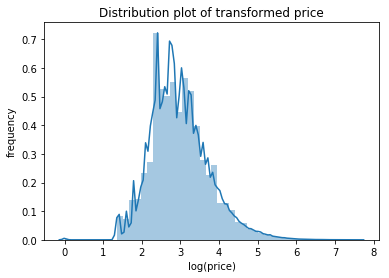

In [37]:
sns.distplot(np.log(raw_data.price+1))
plt.title("Distribution plot of transformed price")
plt.xlabel("log(price)")
plt.ylabel("frequency")

As we can see the log transformation on the price gives a more balanced distribution and it corrects the skew.

Text(0.5, 1.0, 'log(pirce) at various item conditions')

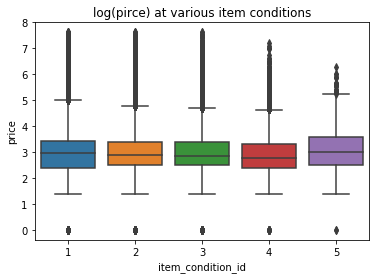

In [38]:
sns.boxplot(x=raw_data['item_condition_id'],y=np.log(raw_data['price']+1))
plt.title("log(pirce) at various item conditions")

Condition of the product is not really able to distinguish between the price points of product by a huge margin. Item condition 5 has the highest average price however item condition 4 has the lowest average price. it is clear that item condition is following no explainable order in terms of price

In [39]:
top_5_brand=raw_data['brand_name'].value_counts()[0:5].index.tolist()
top_5_brand

['Not Present', 'pink', 'lularoe', 'nike', "victoria's secret"]

In [40]:
top_5_brand_data=raw_data[(raw_data['brand_name']=='pink') | 
                          (raw_data['brand_name']=='lularoe') |
                          (raw_data['brand_name']=='nike') |
                         (raw_data['brand_name']=="victoria's secret") |
                         (raw_data['brand_name']=='apple')]

Text(0.5, 1.0, 'Log(price) of top 5 most occuring brands')

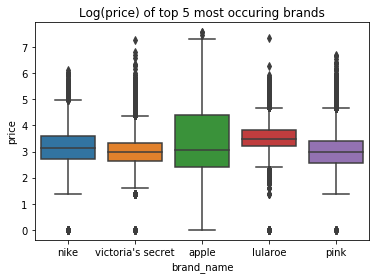

In [41]:
sns.boxplot(x=top_5_brand_data['brand_name'],y=np.log(top_5_brand_data['price']+1),data=top_5_brand_data)
plt.title("Log(price) of top 5 most occuring brands")

brands can possibly help in distinguishing between prices

Text(0.5, 1.0, 'Log price for different shipping options')

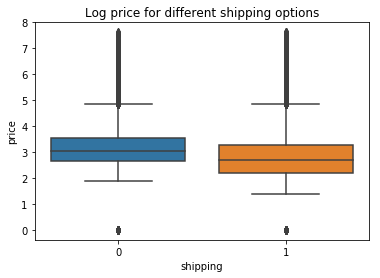

In [42]:
sns.boxplot(x=raw_data['shipping'],y=np.log(raw_data['price']+1))
plt.title("Log price for different shipping options")

products where the shipping charges are paid by the seller have a lower price on an average.

In [43]:
print("Number of unique categories :{}".format(raw_data['category'].nunique()),", fill rate : {}".format(1-raw_data['category'].isnull().sum()/raw_data.shape[0]))
print("Number of unique subcategory1 :{}".format(raw_data['subcategory1'].nunique()),", fill rate : {}".format(1-raw_data['subcategory1'].isnull().sum()/raw_data.shape[0]))
print("Number of unique subcategory2 :{}".format(raw_data['subcategory2'].nunique()),", fill rate : {}".format(1-raw_data['subcategory2'].isnull().sum()/raw_data.shape[0]))


Number of unique categories :10 , fill rate : 0.99573230986115
Number of unique subcategory1 :113 , fill rate : 0.99573230986115
Number of unique subcategory2 :870 , fill rate : 0.99573230986115


all of the brand categories have the same (and very healthy) fill rates

Text(0.5, 1.0, 'Log(price) for different Categories')

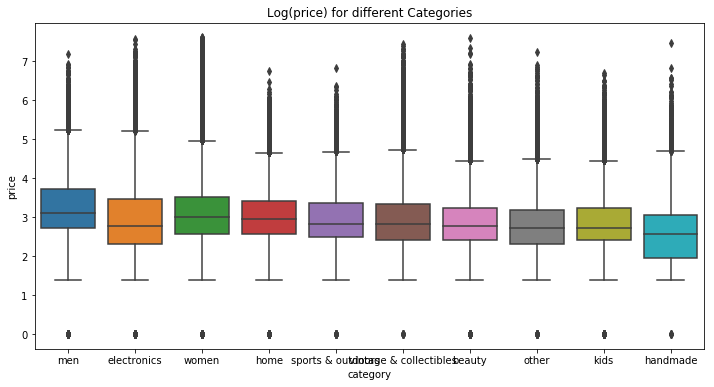

In [44]:
plt.figure(figsize=(12,6))
sns.boxplot(x=raw_data['category'],y=np.log(raw_data['price']+1),)
plt.title("Log(price) for different Categories")

some category of product prices are easily distinguishable. for example Men products and Hand Made products have a clear distinction in price range

In [45]:
#exploring why some product prices are zeroes
print(raw_data[raw_data['price']==0].shape[0])
raw_data[raw_data['price']==0].head(5)

874


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category,subcategory1,subcategory2,Newbrand
1325,1325,alabama crimson tide quality lanyard,1,sports & outdoors/fan shop/ncaa,tide,0.0,1,TOP QUALITY THICK LANYARD Reversible sides wit...,sports & outdoors,fan shop,ncaa,tide
2544,2544,levi leggings,3,"women/jeans/slim, skinny",levi's®,0.0,0,Light wash. Hardly worn. Size 24 but fits like...,women,jeans,"slim, skinny",None
2712,2712,simple red lace lingerie top,3,women/underwear/g-strings & thongs,simple,0.0,0,"Very simple but cute, a little form fitting as...",women,underwear,g-strings & thongs,simple
3576,3576,turquoise 15 pc makeup brush set,1,beauty/tools & accessories/makeup brushes & tools,Not Present,0.0,1,1 left!,beauty,tools & accessories,makeup brushes & tools,None
3761,3761,girls size 7/8,3,kids/girls (4+)/tops & t-shirts,Not Present,0.0,1,5 pair gap jean excellent used condition 3 chi...,kids,girls (4+),tops & t-shirts,None


zero prices seem like a data error. I will exclude these rows from my training data.

In [46]:
# converting all item descritpion to lower case
raw_data['item_description']=raw_data['item_description'].str.lower()

In [47]:
#manually looking at a few descriptions
print(raw_data['item_description'][12])
print(raw_data['item_description'][10])
print(raw_data['item_description'][300])

xl, great condition
0.25 oz full size is 1oz for [rm] in sephora
jordan iphone case only for iphone 6 plus iphone 6s plus only


In [48]:
raw_data['item_description'].isnull().sum()

4

In [49]:
## checking if description contains numbers
import re

def is_combo(column):
    numbers = sum(c.isdigit() for c in str(column))
    words   = sum(c.isalpha() for c in str(column)) 
    if numbers>1:
        return(1)
    else:
        return(0)

In [50]:
raw_data['is_combo']=raw_data['item_description'].apply(is_combo)

In [51]:
raw_data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category,subcategory1,subcategory2,Newbrand,is_combo
0,0,mlb cincinnati reds t shirt size xl,3,men/tops/t-shirts,mlb,10.0,1,no description yet,men,tops,t-shirts,mlb,0
1,1,razer blackwidow chroma keyboard,3,electronics/computers & tablets/components & p...,razer,52.0,0,this keyboard is in great condition and works ...,electronics,computers & tablets,components & parts,razer,0
2,2,ava-viv blouse,1,women/tops & blouses/blouse,target,10.0,1,adorable top with a hint of lace and a key hol...,women,tops & blouses,blouse,None,1
3,3,leather horse statues,1,home/home décor/home décor accents,Not Present,35.0,1,new with tags. leather horses. retail for [rm]...,home,home décor,home décor accents,None,0
4,4,24k gold plated rose,1,women/jewelry/necklaces,Not Present,44.0,0,complete with certificate of authenticity,women,jewelry,necklaces,None,0


In [52]:
raw_data['is_combo'].value_counts()

0    959335
1    523200
Name: is_combo, dtype: int64

523200 products have been marked as combos. looks like a high number

In [53]:
raw_data[raw_data['is_combo']==1].head(5)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category,subcategory1,subcategory2,Newbrand,is_combo
2,2,ava-viv blouse,1,women/tops & blouses/blouse,target,10.0,1,adorable top with a hint of lace and a key hol...,women,tops & blouses,blouse,None,1
10,10,smashbox primer,2,beauty/makeup/face,smashbox,8.0,1,0.25 oz full size is 1oz for [rm] in sephora,beauty,makeup,face,smashbox,1
11,11,new vs pi k body mists,1,beauty/fragrance/women,victoria's secret,34.0,0,(5) new vs pink body mists (2.5 oz each) fresh...,beauty,fragrance,women,None,1
14,14,hold for dogs2016 minnetonka boots,3,women/shoes/boots,ugg australia,43.0,0,authentic. suede fringe boots. great condition...,women,shoes,boots,minnetonka,1
15,15,sephora tarte birthday gift,1,beauty/makeup/makeup sets,tarte,11.0,1,brand new. deluxe travel size products. contai...,beauty,makeup,makeup sets,tarte,1


In [54]:
raw_data['item_description'][14]

"authentic. suede fringe boots. great condition! size 7. if you are between the sizes 5.5-7 and love wearing thick socks during the winter they'd be perfect for you as well (i did last winter) :)"

In [55]:
raw_data['item_description'][15]

'brand new. deluxe travel size products. contains: amazonian clay 12 hour blush in paaarty - .05oz/1.5g tarteist lip paint in birthday suit - .034oz/1ml'

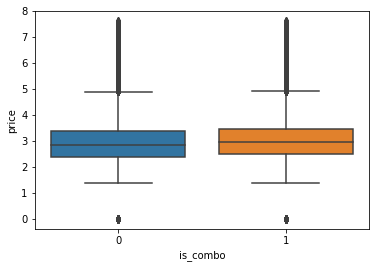

In [56]:
sns.boxplot(x=raw_data['is_combo'],y=np.log(raw_data['price']+1))

in some cases the logic is able to catch combo products, where as in some cases it is misclassifing single products as combo. This variable will have a lot of erroneous points and will introduce unnecessary noise in the data. The box plot also shows that the categorization we have done has not been able to generate a tellable difference in the price of both categories. hence we will be droppig the variable. 

In [57]:
raw_data_zero_price_removed=raw_data[raw_data.price!=0]

In [58]:
raw_data_zero_price_removed.shape

(1481661, 13)

In [59]:
raw_data_zero_price_removed.item_description.isnull().sum()

4

In [60]:
raw_data_zero_price_removed['item_description'].fillna(value='Not Present',inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [61]:
raw_data_zero_price_removed.item_description.isnull().sum()

0

In [62]:
raw_data_zero_price_removed[raw_data_zero_price_removed['item_description']=='Not Present'].shape

(4, 13)

In [63]:
raw_data_zero_price_removed.shape

(1481661, 13)

In [64]:
raw_data_zero_price_removed.head(2)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category,subcategory1,subcategory2,Newbrand,is_combo
0,0,mlb cincinnati reds t shirt size xl,3,men/tops/t-shirts,mlb,10.0,1,no description yet,men,tops,t-shirts,mlb,0
1,1,razer blackwidow chroma keyboard,3,electronics/computers & tablets/components & p...,razer,52.0,0,this keyboard is in great condition and works ...,electronics,computers & tablets,components & parts,razer,0


In [65]:
raw_data_zero_price_removed['brand_length']=raw_data_zero_price_removed['brand_name'].str.len()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
raw_data_zero_price_removed['name_length']=raw_data_zero_price_removed['name'].str.len()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
raw_data_zero_price_removed['desc_length']=raw_data_zero_price_removed['item_description'].str.len()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
raw_data_zero_price_removed.head(2)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category,subcategory1,subcategory2,Newbrand,is_combo,brand_length,name_length,desc_length
0,0,mlb cincinnati reds t shirt size xl,3,men/tops/t-shirts,mlb,10.0,1,no description yet,men,tops,t-shirts,mlb,0,3,35,18
1,1,razer blackwidow chroma keyboard,3,electronics/computers & tablets/components & p...,razer,52.0,0,this keyboard is in great condition and works ...,electronics,computers & tablets,components & parts,razer,0,5,32,188


In [69]:
from scipy.stats import pearsonr

corr,_=pearsonr(raw_data_zero_price_removed['price'],raw_data_zero_price_removed['name_length'])
print(corr)

0.0270579738360066


In [70]:
corr,_=pearsonr(raw_data_zero_price_removed['price'],raw_data_zero_price_removed['desc_length'])
print(corr)

0.04803919893656168


There is no correlation between price and length of the description or name

In [71]:
raw_data_zero_price_removed['log_price']=np.log(raw_data_zero_price_removed['price']+1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
raw_data_zero_price_removed.head(2)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category,subcategory1,subcategory2,Newbrand,is_combo,brand_length,name_length,desc_length,log_price
0,0,mlb cincinnati reds t shirt size xl,3,men/tops/t-shirts,mlb,10.0,1,no description yet,men,tops,t-shirts,mlb,0,3,35,18,2.397895
1,1,razer blackwidow chroma keyboard,3,electronics/computers & tablets/components & p...,razer,52.0,0,this keyboard is in great condition and works ...,electronics,computers & tablets,components & parts,razer,0,5,32,188,3.970292


In [73]:
raw_data_zero_price_removed['category'].fillna(value='Not Present',inplace=True)

In [74]:
raw_data_zero_price_removed['subcategory1'].fillna(value='Not Present',inplace=True)
raw_data_zero_price_removed['subcategory2'].fillna(value='Not Present',inplace=True)

In [75]:
raw_data_zero_price_removed[raw_data_zero_price_removed['category'].isnull()].head(10)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category,subcategory1,subcategory2,Newbrand,is_combo,brand_length,name_length,desc_length,log_price


In [76]:
y=raw_data_zero_price_removed.log_price
x=raw_data_zero_price_removed.drop(['train_id','item_condition_id','category_name','Newbrand','is_combo','name_length','brand_length',
'desc_length','log_price'],axis=1)

In [77]:
# splitting into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [78]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1185328, 8)
(296333, 8)
(1185328,)
(296333,)


In [79]:
x_train.head(2)

,name,brand_name,price,shipping,item_description,category,subcategory1,subcategory2
901879,black nike cortez size 4,nike,18.0,1,size 4. my baby wore once before she was reall...,kids,boys 2t-5t,shoes
984774,hp pavilion dv5000 dv6000 dv8000 dv9000,hp,11.0,1,hp pavilion dv5000 dv6000 dv8000 dv9000 ac ada...,Not Present,Not Present,Not Present


In [80]:
def decontracted(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [81]:
from nltk.corpus import stopwords
stopwords=stopwords.words('english')

In [82]:
len(stopwords)


from tqdm import tqdm
preprocessed_name_train = []
for sentance in tqdm(x_train['name'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_name_train.append(sent.lower().strip())

preprocessed_description_train = []
for sentance in tqdm(x_train['item_description'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_description_train.append(sent.lower().strip())
    
preprocessed_name_test = []
for sentance in tqdm(x_test['name'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_name_test.append(sent.lower().strip())
    
preprocessed_description_test = []
for sentance in tqdm(x_test['item_description'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_description_test.append(sent.lower().strip())

100%|██████████| 296333/296333 [00:33<00:00, 8933.00it/s]


In [83]:
preprocessed_brand_name_train = []
for sentance in tqdm(x_train['brand_name'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_brand_name_train.append(sent.lower().strip())
    
preprocessed_brand_name_test = []
for sentance in tqdm(x_test['brand_name'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_brand_name_test.append(sent.lower().strip())

100%|██████████| 296333/296333 [00:08<00:00, 33578.49it/s]


In [84]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [85]:
## TFIDF on names
vectorizer_name_tfidf = TfidfVectorizer(min_df=10,max_features=20000,ngram_range=(1,3))
name_tfidf_train = vectorizer_name_tfidf.fit_transform(preprocessed_name_train)

print("Shape of matrix after TFIDF vectorizer ",name_tfidf_train.shape)

## TFIDF on name test set
name_tfidf_test = vectorizer_name_tfidf.transform(preprocessed_name_test)
print("Shape of matrix after TFIDF vectorizer ",name_tfidf_test.shape)

Shape of matrix after TFIDF vectorizer  (1185328, 20000)
Shape of matrix after TFIDF vectorizer  (296333, 20000)


In [86]:
## TFIDF on description
vectorizer_desc_tfidf = TfidfVectorizer(min_df=10,max_features=20000,ngram_range=(1,3))
desc_tfidf_train = vectorizer_desc_tfidf.fit_transform(preprocessed_description_train)

print("Shape of matrix after TFIDF vectorizer ",desc_tfidf_train.shape)

## TFIDF on description test set
desc_tfidf_test = vectorizer_desc_tfidf.transform(preprocessed_description_test)
print("Shape of matrix after TFIDF vectorizer ",desc_tfidf_test.shape)

Shape of matrix after TFIDF vectorizer  (1185328, 20000)
Shape of matrix after TFIDF vectorizer  (296333, 20000)


In [87]:
## TFIDF on brand_name
vectorizer_brand_name_tfidf = TfidfVectorizer(min_df=10,max_features=10000,ngram_range=(1,3))
brand_name_tfidf_train = vectorizer_brand_name_tfidf.fit_transform(preprocessed_brand_name_train)

print("Shape of matrix after TFIDF vectorizer ",brand_name_tfidf_train.shape)

## TFIDF on description test set
brand_name_tfidf_test = vectorizer_brand_name_tfidf.transform(preprocessed_brand_name_test)
print("Shape of matrix after TFIDF vectorizer ",brand_name_tfidf_test.shape)

Shape of matrix after TFIDF vectorizer  (1185328, 3294)
Shape of matrix after TFIDF vectorizer  (296333, 3294)


In [88]:
import category_encoders as ce
cat_features = ['category', 'subcategory1', 'subcategory2']
count_enc = ce.CountEncoder()
count_encoded_train = count_enc.fit_transform(x_train[cat_features])
count_encoded_test=count_enc.transform(x_test[cat_features])

In [89]:
x_train_count_encoded=x_train.join(count_encoded_train.add_suffix("_count"))
x_test_count_encoded=x_test.join(count_encoded_test.add_suffix("_count"))

In [90]:
x_test_count_encoded['subcategory2_count'].fillna(0,inplace=True)

In [91]:
x_test_count_encoded.isnull().sum()

name                  0
brand_name            0
price                 0
shipping              0
item_description      0
category              0
subcategory1          0
subcategory2          0
category_count        0
subcategory1_count    0
subcategory2_count    0
dtype: int64

In [92]:
x_test_count_encoded.head(2)

,name,brand_name,price,shipping,item_description,category,subcategory1,subcategory2,category_count,subcategory1_count,subcategory2_count
979365,lularoe black medium irma,lularoe,15.0,1,good used condition. worn and washed per lular...,women,tops & blouses,tunic,530871,85590,6469.0
256740,tom's girls 12.5,toms,14.0,1,2 pairs tom's pink and black good condition. b...,kids,girls 2t-5t,shoes,137173,14774,25791.0


In [93]:
##brand average price
avg_brand_price=pd.DataFrame(x_train_count_encoded.groupby('brand_name',as_index=False)['price'].mean())

avg_brand_price['log_price']=np.log(avg_brand_price['price']+1)

In [94]:
avg_brand_price.head(2)

,brand_name,price,log_price
0,!it jeans,16.000000,2.833213
1,% pure,16.104167,2.839322


In [95]:
#adding average price of each brand in x_train
x_train_count_encoded=pd.merge(x_train_count_encoded,avg_brand_price[['brand_name','log_price']],how='left',on='brand_name')

In [96]:
x_test_count_encoded=pd.merge(x_test_count_encoded,avg_brand_price[['brand_name','log_price']],how='left',on='brand_name')

In [97]:
x_train_count_encoded.rename(columns={'log_price':'avg_brand_price'}, inplace=True)
x_test_count_encoded.rename(columns={'log_price':'avg_brand_price'},inplace=True)

In [98]:
x_train_count_encoded.head(2)

,name,brand_name,price,shipping,item_description,category,subcategory1,subcategory2,category_count,subcategory1_count,subcategory2_count,avg_brand_price
0,black nike cortez size 4,nike,18.0,1,size 4. my baby wore once before she was reall...,kids,boys 2t-5t,shoes,137173,11507,25791,3.446652
1,hp pavilion dv5000 dv6000 dv8000 dv9000,hp,11.0,1,hp pavilion dv5000 dv6000 dv8000 dv9000 ac ada...,Not Present,Not Present,Not Present,5085,5085,5085,4.057824


In [99]:
x_test_count_encoded.head(2)

,name,brand_name,price,shipping,item_description,category,subcategory1,subcategory2,category_count,subcategory1_count,subcategory2_count,avg_brand_price
0,lularoe black medium irma,lularoe,15.0,1,good used condition. worn and washed per lular...,women,tops & blouses,tunic,530871,85590,6469.0,3.627642
1,tom's girls 12.5,toms,14.0,1,2 pairs tom's pink and black good condition. b...,kids,girls 2t-5t,shoes,137173,14774,25791.0,3.152969


In [100]:
##category average price
avg_cat_price=pd.DataFrame(x_train_count_encoded.groupby('category',as_index=False)['price'].mean())

In [101]:
avg_cat_price['log_price']=np.log(avg_cat_price['price']+1)

In [102]:
avg_cat_price.head()

,category,price,log_price
0,Not Present,25.594789,3.280715
1,beauty,19.657413,3.028074
2,electronics,35.188395,3.588738
3,handmade,18.163272,2.952996
4,home,24.461362,3.237162


In [103]:
##updating average category price in train and test
#adding average price of each brand in x_train
x_train_count_encoded=pd.merge(x_train_count_encoded,avg_cat_price[['category','log_price']],how='left',on='category')

x_test_count_encoded=pd.merge(x_test_count_encoded,avg_cat_price[['category','log_price']],how='left',on='category')

x_train_count_encoded.rename(columns={'log_price':'avg_cat_price'}, inplace=True)
x_test_count_encoded.rename(columns={'log_price':'avg_cat_price'},inplace=True)

In [104]:
x_train_count_encoded.head(2)

,name,brand_name,price,shipping,item_description,category,subcategory1,subcategory2,category_count,subcategory1_count,subcategory2_count,avg_brand_price,avg_cat_price
0,black nike cortez size 4,nike,18.0,1,size 4. my baby wore once before she was reall...,kids,boys 2t-5t,shoes,137173,11507,25791,3.446652,3.076385
1,hp pavilion dv5000 dv6000 dv8000 dv9000,hp,11.0,1,hp pavilion dv5000 dv6000 dv8000 dv9000 ac ada...,Not Present,Not Present,Not Present,5085,5085,5085,4.057824,3.280715


In [105]:
x_test_count_encoded.head(2)

,name,brand_name,price,shipping,item_description,category,subcategory1,subcategory2,category_count,subcategory1_count,subcategory2_count,avg_brand_price,avg_cat_price
0,lularoe black medium irma,lularoe,15.0,1,good used condition. worn and washed per lular...,women,tops & blouses,tunic,530871,85590,6469.0,3.627642,3.395491
1,tom's girls 12.5,toms,14.0,1,2 pairs tom's pink and black good condition. b...,kids,girls 2t-5t,shoes,137173,14774,25791.0,3.152969,3.076385


In [106]:
##subcategory average price
avg_subcat1_price=pd.DataFrame(x_train_count_encoded.groupby('subcategory1',as_index=False)['price'].mean())

avg_subcat1_price['log_price']=np.log(avg_subcat1_price['price']+1)


##updating average subcategory price in train and test
x_train_count_encoded=pd.merge(x_train_count_encoded,avg_subcat1_price[['subcategory1','log_price']],how='left',on='subcategory1')

x_test_count_encoded=pd.merge(x_test_count_encoded,avg_subcat1_price[['subcategory1','log_price']],how='left',on='subcategory1')

x_train_count_encoded.rename(columns={'log_price':'avg_subcat1_price'}, inplace=True)
x_test_count_encoded.rename(columns={'log_price':'avg_subcat1_price'},inplace=True)

In [107]:
##subcategory average price
avg_subcat2_price=pd.DataFrame(x_train_count_encoded.groupby('subcategory2',as_index=False)['price'].mean())

avg_subcat2_price['log_price']=np.log(avg_subcat2_price['price']+1)


##updating average subcategory price in train and test
x_train_count_encoded=pd.merge(x_train_count_encoded,avg_subcat2_price[['subcategory2','log_price']],how='left',on='subcategory2')

x_test_count_encoded=pd.merge(x_test_count_encoded,avg_subcat2_price[['subcategory2','log_price']],how='left',on='subcategory2')

x_train_count_encoded.rename(columns={'log_price':'avg_subcat2_price'}, inplace=True)
x_test_count_encoded.rename(columns={'log_price':'avg_subcat2_price'},inplace=True)

In [108]:
x_train_count_encoded.head(2)

,name,brand_name,price,shipping,item_description,category,subcategory1,subcategory2,category_count,subcategory1_count,subcategory2_count,avg_brand_price,avg_cat_price,avg_subcat1_price,avg_subcat2_price
0,black nike cortez size 4,nike,18.0,1,size 4. my baby wore once before she was reall...,kids,boys 2t-5t,shoes,137173,11507,25791,3.446652,3.076385,2.981968,3.252362
1,hp pavilion dv5000 dv6000 dv8000 dv9000,hp,11.0,1,hp pavilion dv5000 dv6000 dv8000 dv9000 ac ada...,Not Present,Not Present,Not Present,5085,5085,5085,4.057824,3.280715,3.280715,3.280715


In [109]:
x_test_count_encoded.head(2)

,name,brand_name,price,shipping,item_description,category,subcategory1,subcategory2,category_count,subcategory1_count,subcategory2_count,avg_brand_price,avg_cat_price,avg_subcat1_price,avg_subcat2_price
0,lularoe black medium irma,lularoe,15.0,1,good used condition. worn and washed per lular...,women,tops & blouses,tunic,530871,85590,6469.0,3.627642,3.395491,2.959278,3.379576
1,tom's girls 12.5,toms,14.0,1,2 pairs tom's pink and black good condition. b...,kids,girls 2t-5t,shoes,137173,14774,25791.0,3.152969,3.076385,2.948304,3.252362


In [110]:
x_test_count_encoded['avg_brand_price'].fillna(0,inplace=True)
x_test_count_encoded['avg_subcat2_price'].fillna(0,inplace=True)

In [111]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_TRAIN = hstack((name_tfidf_train,desc_tfidf_train,brand_name_tfidf_train,x_train_count_encoded[['shipping','category_count','subcategory1_count','subcategory2_count','avg_brand_price','avg_cat_price','avg_subcat1_price','avg_subcat2_price']])).tocsr()
X_TRAIN.shape

(1185328, 43302)

In [112]:
X_TEST = hstack((name_tfidf_test,desc_tfidf_test,brand_name_tfidf_test,x_test_count_encoded[['shipping','category_count','subcategory1_count','subcategory2_count','avg_brand_price','avg_cat_price','avg_subcat1_price','avg_subcat2_price']])).tocsr()
X_TEST.shape

(296333, 43302)

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor = LinearRegression(n_jobs=-1)  
regressor.fit(X_TRAIN, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [114]:
y_pred = regressor.predict(X_TEST)

In [115]:
y_pred[y_pred<0]=0

In [116]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y_test, y_pred))

0.12587940759956284

In [117]:
from sklearn.linear_model import Ridge
model_ridge = Ridge(solver="auto", fit_intercept=True, random_state=205, alpha=0.4)
model_ridge.fit(X_TRAIN, y_train)

Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=205, solver='auto', tol=0.001)

In [118]:
pred_ridge = model_ridge.predict(X_TEST)

In [119]:
np.sqrt(mean_squared_log_error(y_test, pred_ridge))

0.18397987948055602

In [120]:
#preparing test data

test_data['name']=test_data['name'].str.lower()
test_data['category_name']=test_data['category_name'].str.lower()

sub_category_columns_test=test_data['category_name'].str.split("/",expand=True,n=2)

test_data['category']=sub_category_columns_test[0]
test_data['subcategory1']=sub_category_columns_test[1]
test_data['subcategory2']=sub_category_columns_test[2]

test_data['brand_name']=test_data['brand_name'].str.lower()

# converting all item descritpion to lower case
test_data['item_description']=test_data['item_description'].str.lower()

test_data['item_description'].fillna(value='Not Present',inplace=True)

test_data['category'].fillna(value='Not Present',inplace=True)

test_data['brand_name'].fillna(value='Not Present',inplace=True)

test_data['subcategory1'].fillna(value='Not Present',inplace=True)
test_data['subcategory2'].fillna(value='Not Present',inplace=True)


preprocessed_name_query = []
for sentance in tqdm(test_data['name'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_name_query.append(sent.lower().strip())

preprocessed_description_query = []
for sentance in tqdm(test_data['item_description'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_description_query.append(sent.lower().strip())
    
preprocessed_brand_name_query = []
for sentance in tqdm(test_data['brand_name'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_brand_name_query.append(sent.lower().strip())

name_tfidf_query = vectorizer_name_tfidf.transform(preprocessed_name_query)
print("Shape of matrix after TFIDF vectorizer ",name_tfidf_query.shape)

desc_tfidf_query = vectorizer_desc_tfidf.transform(preprocessed_description_query)
print("Shape of matrix after TFIDF vectorizer ",desc_tfidf_query.shape)

brand_name_tfidf_query = vectorizer_brand_name_tfidf.transform(preprocessed_brand_name_query)
print("Shape of matrix after TFIDF vectorizer ",brand_name_tfidf_query.shape)

count_encoded_query=count_enc.transform(test_data[cat_features])

test_data=test_data.join(count_encoded_query.add_suffix("_count"))

test_data=pd.merge(test_data,avg_brand_price[['brand_name','log_price']],how='left',on='brand_name')

test_data.rename(columns={'log_price':'avg_brand_price'}, inplace=True)

test_data=pd.merge(test_data,avg_cat_price[['category','log_price']],how='left',on='category')

test_data.rename(columns={'log_price':'avg_cat_price'}, inplace=True)

test_data=pd.merge(test_data,avg_subcat1_price[['subcategory1','log_price']],how='left',on='subcategory1')

test_data.rename(columns={'log_price':'avg_subcat1_price'}, inplace=True)

test_data=pd.merge(test_data,avg_subcat2_price[['subcategory2','log_price']],how='left',on='subcategory2')

test_data.rename(columns={'log_price':'avg_subcat2_price'}, inplace=True)


test_data['category_count'].fillna(0,inplace=True)
test_data['subcategory1_count'].fillna(0,inplace=True)
test_data['subcategory2_count'].fillna(0,inplace=True)
test_data['avg_brand_price'].fillna(0,inplace=True)
test_data['avg_cat_price'].fillna(0,inplace=True)
test_data['avg_subcat1_price'].fillna(0,inplace=True)
test_data['avg_subcat2_price'].fillna(0,inplace=True)

100%|██████████| 3460725/3460725 [01:49<00:00, 31653.21it/s]


Shape of matrix after TFIDF vectorizer  (3460725, 20000)
Shape of matrix after TFIDF vectorizer  (3460725, 20000)
Shape of matrix after TFIDF vectorizer  (3460725, 3294)


In [121]:
x_query = hstack((name_tfidf_query,desc_tfidf_query,brand_name_tfidf_query,test_data[['shipping','category_count','subcategory1_count','subcategory2_count','avg_brand_price','avg_cat_price','avg_subcat1_price','avg_subcat2_price']])).tocsr()
x_query.shape

(3460725, 43302)

In [122]:
y_pred_query = model_ridge.predict(x_query)

In [123]:
y_pred_query[y_pred_query<0]=0

In [124]:
y_pred_query=np.exp(y_pred_query)-1

In [125]:
test_data['price']=y_pred_query

In [126]:
sub1=test_data[['test_id','price']]

In [127]:
sub1.to_csv('submission.csv',index=False)